# Setup
- 참고문서
  - https://wikidocs.net/book/14473
  - https://wikidocs.net/book/14314
  - https://github.com/teddylee777/langchain-kr

## Install

In [ ]:
!pip install langchain_teddynote

In [ ]:
!pip install -U langchain langchain-community langchain-experimental langchain-core langchain-openai langsmith langchainhub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 735.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.9/206.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.8/289.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.1/374.1 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318

## OpenAI Key 등록
- [OpenAI Key 발급방법](https://platform.openai.com/api-keys)
- [OpenAI 요금](https://openai.com/api/pricing/)

In [ ]:
import os

os.environ['OPENAI_API_KEY'] = '생성한 키 입력'

## 구글 드라이브 연결(데이터 로드를 위해서)

In [ ]:
# 구글 드라이브 연결(데이터 로드를 위해서)

try:
    from google.colab import drive

    drive.mount('/content/data')
    DATA_PATH = "/content/data/MyDrive/ai_lecture/3. Large Language Models/data/"
except:

    DATA_PATH = "./data/"

Mounted at /content/data


# [Prompt](https://data-newbie.tistory.com/965#pipeline)
- 언어 모델에 대한 프롬프트는 사용자가 제공하는 지침이나 입력의 집합으로, 모델의 응답을 안내하고 문맥을 이해하며 질문에 답하거나 문장을 완성하거나 대화를 나누는 등 관련성 있고 일관된 언어 기반 출력을 생성하는 데 도움을 주는 역할을 합니다.
- 하지만 일반적으로 사용자들이 일반적인 질문을 하게 되면 원하는 결과가 나오지 않는 경우가 많이 나온다.

그래서 `prompt engineering`이라는 것이 필요하게 된다.

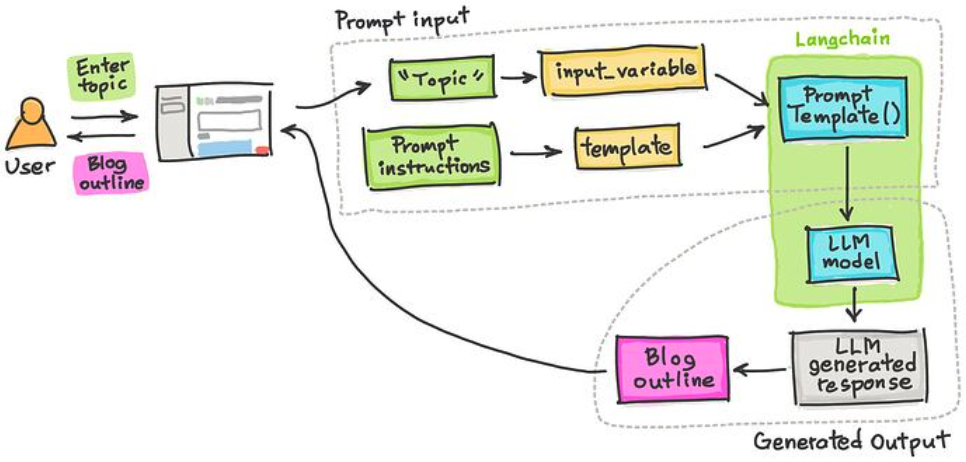

## Prompt Engineering

- 프롬프트 엔지니어링의 주요 목표는 사용자의 의도와 원하는 결과를 전달하는 프롬프트를 만들어 모델의 성능, 정확성, 유용성을 극대화하는 것이다.
- 프롬프트 엔지니어링이 필요한 이유는 현재 LLM의 동작 방식의 한계와 인간과 컴퓨터의 상호 작용을 위해 자연어를 사용하고 있기 때문이다.

프롬프트는 일반적으로 여러 부분으로 구성된다.

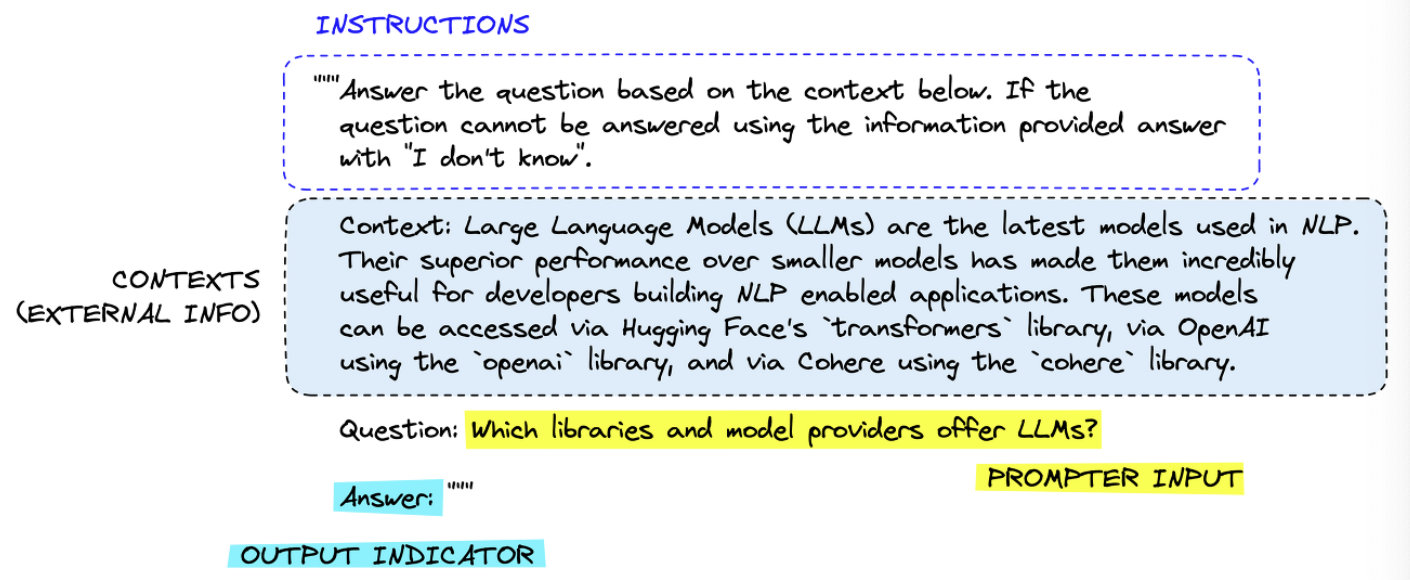

- 모든 프롬프트가 이러한 구성 요소를 사용하는 것은 아니지만, 좋은 프롬프트는 일반적으로 두 개 이상의 구성 요소를 사용합니다. 이들을 더 정확하게 정의해 보겠습니다.

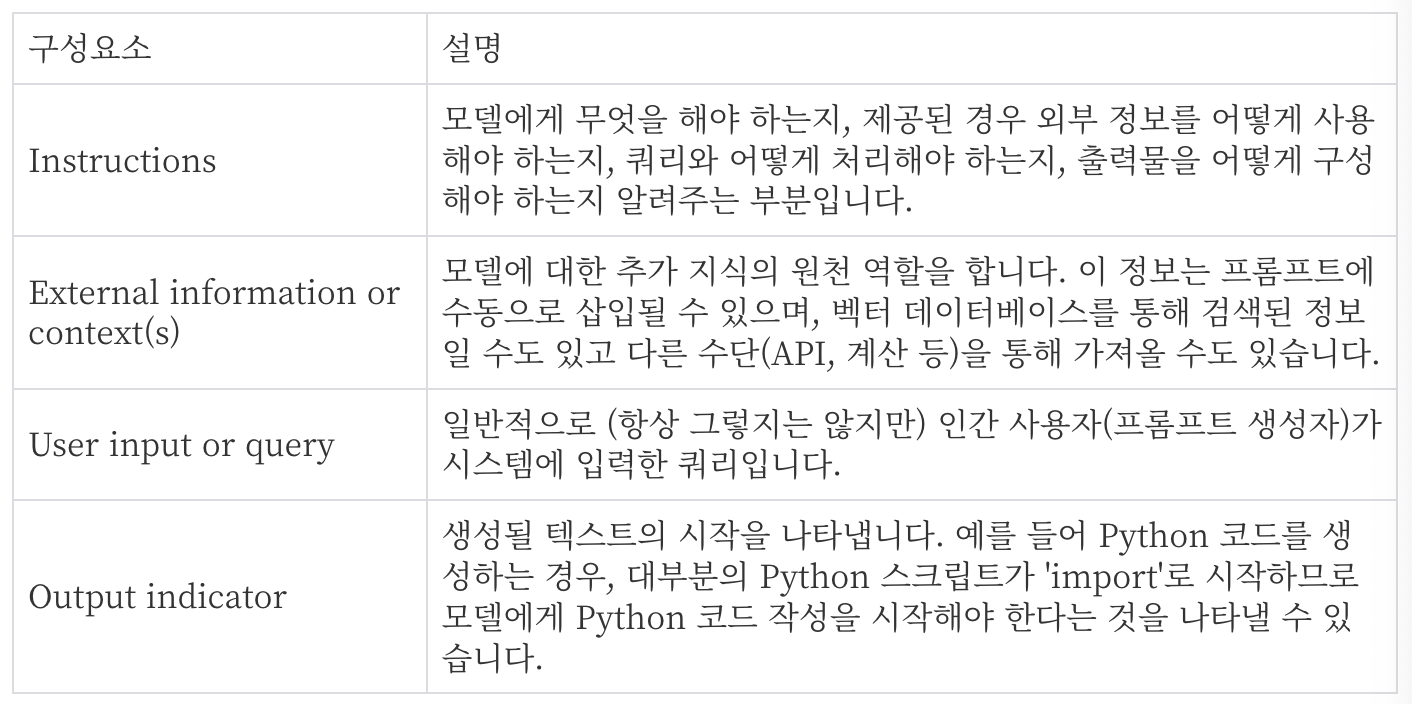

## 프롬프트 작성방법

1. 명확성과 구체성
  - 질문은 명확하고 구체적이어야 합니다. 모호한 질문은 LLM 모델의 혼란을 초래할 수 있기 때문입니다.
  - 예시: "다음 주 주식 시장에 영향을 줄 수 있는 예정된 이벤트들은 무엇일까요?"는 "주식 시장에 대해 알려주세요."보다 더 구체적이고 명확한 질문입니다.
2. 배경 정보를 포함
  - 모델이 문맥을 이해할 수 있도록 필요한 배경 정보를 제공하는 것이 좋습니다. 이는 환각 현상(hallucination)이 발생할 위험을 낮추고, 관련성 높은 응답을 생성하는 데 도움을 줍니다.
  - 예시: "2020년 미국 대선의 결과를 바탕으로 현재 정치 상황에 대한 분석을 해주세요."
3. 간결함
  - 핵심 정보에 초점을 맞추고, 불필요한 정보는 배제합니다. 프롬프트가 길어지면 모델이 덜 중요한 부분에 집중하거나 상당한 영향을 받는 문제가 발생할 수 있습니다.
  - 예시: "2021년에 발표된 삼성전자의 ESG 보고서를 요약해주세요."
4. 열린 질문 사용
  - 열린 질문을 통해 모델이 자세하고 풍부한 답변을 제공하도록 유도합니다. 단순한 '예' 또는 '아니오'로 대답할 수 있는 질문보다는 더 많은 정보를 제공하는 질문이 좋습니다.
  - 예시: "신재생에너지에 대한 최신 연구 동향은 무엇인가요?"
5. 명확한 목표 설정
  - 얻고자 하는 정보나 결과의 유형을 정확하게 정의합니다. 이는 모델이 명확한 지침에 따라 응답을 생성하도록 돕습니다.
  - 예시: "AI 윤리에 대한 문제점과 해결 방안을 요약하여 설명해주세요."
6. 언어와 문체
  - 대화의 맥락에 적합한 언어와 문체를 선택합니다. 이는 모델이 상황에 맞는 표현을 선택하는데 도움이 됩니다.
  - 예시: 공식적인 보고서를 요청하는 경우, "XX 보고서에 대한 전문적인 요약을 부탁드립니다."와 같이 정중한 문체를 사용합니다.

## [PromptTemplate](https://python.langchain.com/v0.1/docs/modules/model_io/prompts/quick_start/#prompttemplate)
- PromptTemplate은 단일 문장 또는 간단한 명령을 입력하여 단일 문장 또는 간단한 응답을 생성하는 데 사용되는 프롬프트를 구성할 수 있는 문자열 템플릿입니다.
- Python의 문자열 포맷팅을 사용하여 동적으로 특정한 위치에 입력 값을 포함시킬 수 있습니다.

### 문자열 템플릿

다음 예제는 `langchain_core.prompts` 모듈의 `PromptTemplate` 클래스를 사용하여, 'name'과 'age'라는 두 개의 변수를 포함하는 프롬프트 템플릿을 정의하고 있습니다. 이 템플릿을 이용하여 실제 입력값을 해당 위치에 채워 넣어 완성된 프롬프트를 생성하는 과정을 보여줍니다.
1. `PromptTemplate.from_template` 메서드를 사용하여 문자열 템플릿으로부터 `PromptTemplate` 인스턴스를 생성합니다. 이때, `template_text` 변수에 정의된 템플릿 문자열이 사용됩니다.
2. 생성된 `PromptTemplate` 인스턴스의 `format` 메서드를 사용하여, 실제 'name'과 'age' 값으로 템플릿에 채워서 프롬프트를 구성합니다. 여기서는 `name="홍길동", age=30`으로 지정하여 호출합니다.
3. 결과적으로, `filled_prompt` 변수에는 "안녕하세요, 제 이름은 홍길동이고, 나이는 30살입니다."라는 완성된 프롬프트 문자열이 저장됩니다.

In [ ]:
from langchain_core.prompts import PromptTemplate

# 'name'과 'age'라는 두 개의 변수를 사용하는 프롬프트 템플릿을 정의
template_text = "안녕하세요, 제 이름은 {name}이고, 나이는 {age}살입니다."

template_text

'안녕하세요, 제 이름은 {name}이고, 나이는 {age}살입니다.'

In [ ]:
# PromptTemplate 인스턴스를 생성
prompt_template = PromptTemplate.from_template(template_text)

prompt_template

PromptTemplate(input_variables=['age', 'name'], input_types={}, partial_variables={}, template='안녕하세요, 제 이름은 {name}이고, 나이는 {age}살입니다.')

In [ ]:
# 템플릿에 값을 채워서 프롬프트를 완성
filled_prompt = prompt_template.format(name="홍길동", age=30)

filled_prompt

'안녕하세요, 제 이름은 홍길동이고, 나이는 30살입니다.'

### 프롬프트 템플릿 결합

`PromptTemplate` 클래스는 문자열을 기반으로 프롬프트 템플릿을 생성하고, + 연산자를 사용하여 직접 결합하는 동작을 지원합니다. `PromptTemplate` 인스턴스 간의 직접적인 결합뿐만 아니라, 이들 인스턴스와 문자열로 이루어진 템플릿을 결합하여 새로운 `PromptTemplate` 인스턴스를 생성하는 것도 가능합니다.
- 문자열 + 문자열
- PromptTemplate + PromptTemplate
- PromptTemplate + 문자열

In [ ]:
# 문자열 템플릿 결합 (PromptTemplate + PromptTemplate + 문자열)
combined_prompt = (
              prompt_template
              + PromptTemplate.from_template("\n\n아버지를 아버지라 부를 수 없습니다.")
              + "\n\n{language}로 번역해주세요."
)

combined_prompt

PromptTemplate(input_variables=['age', 'language', 'name'], input_types={}, partial_variables={}, template='안녕하세요, 제 이름은 {name}이고, 나이는 {age}살입니다.\n\n아버지를 아버지라 부를 수 없습니다.\n\n{language}로 번역해주세요.')

- `format` 메소드를 사용하여 앞에서 생성한 템플릿의 매개변수에 입력 값을 지정합니다.
- LLM에게 전달할 프롬프트가 완성되는데, 주어진 문장을 "영어로 번역해주세요." 라는 지시사항을 포함하고 있습니다.

In [ ]:
combined_prompt.format(name="홍길동", age=30, language="영어")

'안녕하세요, 제 이름은 홍길동이고, 나이는 30살입니다.\n\n아버지를 아버지라 부를 수 없습니다.\n\n영어로 번역해주세요.'

- `ChatOpenAI` 인스턴스를 생성하여 프롬프트 텍스트를 전달하고, 모델의 출력을 `StrOutputParser`를 통해 문자열로 변환하는 `LLM 체인`을 구성합니다.
- `invoke` 메소드를 사용하여 파이프라인을 실행하고, 최종적으로 문자열 출력을 얻습니다.
- 모델의 응답은 프롬프트에 주어진 문장을 영어로 번역한 텍스트가 출력됩니다.

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser

# 모델 선언
llm = ChatOpenAI(model="gpt-3.5-turbo-0125")
# LLM 체인 선언
chain = combined_prompt | llm | StrOutputParser()
# 실행
chain.invoke({"age":30, "language":"영어", "name":"홍길동"})

'Hello, my name is Hong Gil-dong and I am 30 years old.\n\nI cannot call my father "father."'

## [ChatPromptTemplate](https://python.langchain.com/v0.1/docs/modules/model_io/prompts/quick_start/#chatprompttemplate)
- ChatPromptTemplate은 대화형 상황에서 여러 메시지 입력을 기반으로 단일 메시지 응답을 생성하는 데 사용됩니다.
- 이는 대화형 모델이나 챗봇 개발에 주로 사용됩니다.
- 입력은 여러 메시지를 원소로 갖는 리스트로 구성되며, 각 메시지는 역할(role)과 내용(content)으로 구성됩니다.

### Message 유형

- SystemMessage: 시스템의 기능을 설명합니다.
- HumanMessage: 사용자의 질문을 나타냅니다.
- AIMessage: AI 모델의 응답을 제공합니다.
- FunctionMessage: 특정 함수 호출의 결과를 나타냅니다.
- ToolMessage: 도구 호출의 결과를 나타냅니다.

### 튜플 형태의 메시지 리스트

- `ChatPromptTemplate.from_messages` 메서드를 사용하여 메시지 리스트로부터 `ChatPromptTemplate` 인스턴스를 생성하는 방식은 대화형 프롬프트를 생성하는 데 유용합니다.
- 이 메서드는 2-튜플 형태의 메시지 리스트를 입력 받아, 각 `메시지의 역할(type)`과 `내용(content)`을 기반으로 프롬프트를 구성합니다.

다음 예시에서 `ChatPromptTemplate.from_messages` 메서드는 전달된 메시지들을 기반으로 프롬프트를 구성합니다. 그리고 `format_messages` 메서드는 사용자의 입력을 프롬프트에 동적으로 삽입하여, 최종적으로 대화형 상황을 반영한 메시지 리스트를 생성합니다. 시스템은 자신의 기능을 설명하고, 사용자는 천문학 관련 질문을 합니다.

In [ ]:
# 2-튜플 형태의 메시지 목록으로 프롬프트 생성 (type, content)

from langchain_core.prompts import ChatPromptTemplate

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", "이 시스템은 천문학 질문에 답변할 수 있습니다."),
    ("human", "{user_input}"),
])

messages = chat_prompt.format_messages(user_input="태양계에서 가장 큰 행성은 무엇인가요?")
messages

[SystemMessage(content='이 시스템은 천문학 질문에 답변할 수 있습니다.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='태양계에서 가장 큰 행성은 무엇인가요?', additional_kwargs={}, response_metadata={})]

- chat_prompt, llm, StrOutputParser()를 순차적인 파이프라인으로 연결하여 구성된 chain을 사용합니다.
- invoke 메소드를 호출하면 사용자 입력을 받아 언어 모델에 전달하고, 모델의 응답을 처리하여 최종 문자열 결과를 반환하는 과정을 자동화하여 수행합니다.
- 사용자는 천문학 관련 질문에 대한 언어 모델의 응답을 얻을 수 있습니다.

In [ ]:
from langchain_core.output_parsers import StrOutputParser

chain = chat_prompt | llm | StrOutputParser()

chain.invoke({"user_input": "태양계에서 가장 큰 행성은 무엇인가요?"})

'태양계에서 가장 큰 행성은 목성입니다. 목성은 지름이 약 142,984km로 태양계에서 가장 큰 행성이며, 또한 가장 많은 자연위성을 가지고 있습니다.'

### MessagePromptTemplate 활용

- 다음 예제는 `SystemMessagePromptTemplate`와 `HumanMessagePromptTemplate`를 사용하여 천문학 질문에 답변할 수 있는 시스템에 대한 대화형 프롬프트를 생성합니다.
- `ChatPromptTemplate.from_messages` 메소드를 통해 시스템 메시지와 사용자 메시지 템플릿을 포함하는 챗 프롬프트를 구성합니다.
- 이후, `chat_prompt.format_messages` 메서드를 사용하여 사용자의 질문을 포함한 메시지 리스트를 동적으로 생성합니다.

In [ ]:
# MessagePromptTemplate 활용

from langchain_core.prompts import SystemMessagePromptTemplate,  HumanMessagePromptTemplate

chat_prompt = ChatPromptTemplate.from_messages(
    [
        # system
        SystemMessagePromptTemplate.from_template("이 시스템은 천문학 질문에 답변할 수 있습니다."),
        # user
        HumanMessagePromptTemplate.from_template("{user_input}"),
    ]
)

messages = chat_prompt.format_messages(user_input="태양계에서 가장 큰 행성은 무엇인가요?")
messages

[SystemMessage(content='이 시스템은 천문학 질문에 답변할 수 있습니다.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='태양계에서 가장 큰 행성은 무엇인가요?', additional_kwargs={}, response_metadata={})]

- 이렇게 생성된 메시지 리스트는 대화형 인터페이스나 언어 모델과의 상호작용을 위한 입력으로 사용될 수 있습니다.
- 각 메시지는 role (메시지를 말하는 주체, 여기서는 system 또는 user)과 content (메시지의 내용) 속성을 포함합니다.
- 이 구조는 시스템과 사용자 간의 대화 흐름을 명확하게 표현하며, 언어 모델이 이를 기반으로 적절한 응답을 생성할 수 있도록 돕습니다.

In [ ]:
chain = chat_prompt | llm | StrOutputParser()

chain.invoke({"user_input": "태양계에서 가장 큰 행성은 무엇인가요?"})

'태양계에서 가장 큰 행성은 목성입니다. 목성은 질량, 부피, 지름 등 모든 측면에서 태양계에서 가장 큰 행성입니다.'

# Model
- 랭체인 문서에 따르면 `LLM`과 `Chat Model` 클래스는 각각 다른 형태의 입력과 출력을 다루는 언어 모델을 나타냅니다.
- 이 두 모델은 각기 다른 특성과 용도를 가지고 있어, 사용자의 요구사항에 맞게 선택하여 사용할 수 있습니다.
- 일반적으로 `LLM`은 주로 단일 요청에 대한 복잡한 출력을 생성하는 데 적합한 반면, `Chat Model`은 사용자와의 상호작용을 통한 연속적인 대화 관리에 더 적합합니다.

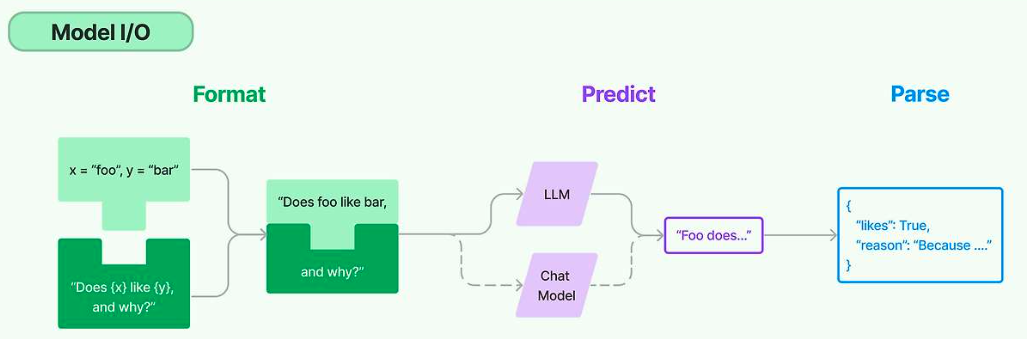

## Large Language Models (LLMs)

- `기능`
  - LLM 클래스는 텍스트 문자열을 입력으로 받아 처리한 후, 텍스트 문자열을 반환합니다. 이 모델은 광범위한 언어 이해 및 텍스트 생성 작업에 사용됩니다. 예를 들어, 문서 요약, 콘텐츠 생성, 질문에 대한 답변 생성 등 복잡한 자연어 처리 작업을 수행할 수 있습니다.
- `예시`
  - 사용자가 특정 주제에 대한 설명을 요청할 때, LLM은 주어진 텍스트 입력을 바탕으로 상세한 설명을 생성하여 반환할 수 있습니다.

### LLM 인터페이스 특징

- `표준화된 인터페이스`
  - 랭체인의 LLM 클래스는 사용자가 문자열을 입력으로 제공하면, 그에 대한 응답으로 문자열을 반환하는 표준화된 방식을 제공합니다.
  - 이는 다양한 LLM 제공 업체 간의 호환성을 보장하며, 사용자는 복잡한 API 변환 작업 없이 여러 LLM을 쉽게 탐색하고 사용할 수 있습니다.
- `다양한 LLM 제공 업체 지원`
  - 랭체인은 OpenAI의 GPT 시리즈, Cohere의 LLM, Hugging Face의 Transformer 모델 등 다양한 LLM 제공 업체와의 통합을 지원합니다.
  - 이를 통해 사용자는 자신의 요구 사항에 가장 적합한 모델을 선택하여 사용할 수 있습니다.

### 예제
- 다음 예제는 LLM을 사용하여 직접적인 질문에 대한 답변을 생성하는 방법을 보여줍니다.
- langchain_openai 모듈의 OpenAI 클래스를 사용하여 LLM 인스턴스를 생성합니다.
- invoke 메소드를 사용하여 질문("한국의 대표적인 관광지 3군데를 추천해주세요.")을 LLM에 전달하고, 관광지 추천을 받습니다.

In [ ]:
from langchain_openai import OpenAI

llm = OpenAI()

llm.invoke("한국의 대표적인 관광지 3군데를 추천해주세요.")

'\n\n1. 경복궁 - 서울에 위치한 대한민국의 궁궐 중 가장 큰 규모를 자랑하는 곳으로 조선 왕조의 궁궐로 사용되었던 곳입니다. 아름다운 조각과 건축물들이 많이 보존되어 있어 전통 한국 문화를 체험할 수 있습니다.\n\n2. 제주도 - 한국의 최남단에 위치한 제주도는 다양한 자연경관과 문화유산이 풍부한 곳입니다. 제주도의 대표적인 관광지로는 한라산, 성산일출봉, 우도 등이 있으며, 해녀문화, 제주도 특산품 등 다양한 매력을 느낄 수 있습니다.\n\n3. 경주 - 경상북도에 위치한 경주는 고대'

- `temperature`
  - 사용할 샘플링 온도는 0과 2 사이에서 선택합니다. 0.8과 같은 높은 값은 출력을 더 무작위하게 만들고, 0.2와 같은 낮은 값은 출력을 더 집중되고 결정론적으로 만듭니다.
- `max_tokens`
  - 채팅 완성에서 생성할 토큰의 최대 개수입니다.
- `model_name`
  - 적용 가능한 모델 리스트
  - https://platform.openai.com/docs/models

In [ ]:
# 객체 생성
llm = ChatOpenAI(
    temperature=0,  # 창의성 (0.0 ~ 2.0)
    max_tokens=2048,  # 최대 토큰수
    model_name="gpt-3.5-turbo",  # 모델명
)

# 질의내용
question = "대한민국의 수도는 뭐야?"

# 질의
print(f"[답변]: {llm.predict(question)}")

<ipython-input-19-56f4a162cd97>:12: LangChainDeprecationWarning: The method `BaseChatModel.predict` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use invoke instead.
  print(f"[답변]: {llm.predict(question)}")


[답변]: 대한민국의 수도는 서울이야.


## Chat Model

- `기능`
  - Chat Model 클래스는 메시지의 리스트를 입력으로 받고, 하나의 메시지를 반환합니다.
  - 이 모델은 대화형 상황에 최적화되어 있으며, 사용자와의 연속적인 대화를 처리하는 데 사용됩니다.
  - Chat Model은 대화의 맥락을 유지하면서 적절한 응답을 생성하는 데 중점을 둡니다.
- `예시`
  - 사용자가 챗봇과 대화하는 상황에서, 사용자의 질문과 이전 대화 내용을 고려하여 적절한 답변을 생성합니다.

### Chat Model 인터페이스 특징

- `대화형 입력과 출력`
  - Chat Model은 대화의 연속성을 고려하여 입력된 메시지 리스트를 기반으로 적절한 응답 메시지를 생성합니다.
  - 챗봇, 가상 비서, 고객 지원 시스템 등 대화 기반 서비스에 어울립니다.
- `다양한 모델 제공 업체와의 통합`
  - 랭체인은 OpenAI, Cohere, Hugging Face 등 다양한 모델 제공 업체와의 통합을 지원합니다.
  - 이를 통해 개발자는 여러 소스의 Chat Models를 조합하여 활용할 수 있습니다.
- `다양한 작동 모드 지원`
  - 랭체인은 동기(sync), 비동기(async), 배치(batching), 스트리밍(streaming) 모드에서 모델을 사용할 수 있는 기능을 제공합니다.
  - 다양한 애플리케이션 요구사항과 트래픽 패턴에 따라 유연한 대응이 가능합니다.

### 예제
- 다음 예제는 Chat Model을 사용하여 대화형 인터페이스를 구현하는 방법을 나타냅니다.
- ChatPromptTemplate를 사용하여 대화형 프롬프트를 생성합니다.
- 이 프롬프트는 시스템이 여행 전문가라는 정보와 사용자 입력을 포함합니다.
- ChatOpenAI 클래스를 사용하여 Chat Model 인스턴스를 생성합니다.
- 파이프(|) 연산자를 사용하여 구성요소를 연결하여 체인을 정의합니다.
- invoke 메소드를 사용하여 사용자의 질문("안녕하세요? 한국의 대표적인 관광지 3군데를 추천해주세요.")을 모델에 전달하고 응답을 받습니다.

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

chat = ChatOpenAI()

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", "이 시스템은 여행 전문가입니다."),
    ("user", "{user_input}"),
])

chain = chat_prompt | chat
chain.invoke({"user_input": "안녕하세요? 한국의 대표적인 관광지 3군데를 추천해주세요."})

AIMessage(content='안녕하세요! 한국의 대표적인 관광지 3군데를 추천해 드리겠습니다.\n\n1. 경복궁 (Gyeongbokgung Palace) - 서울의 대표적인 궁전으로, 조선 시대의 궁중 문화와 역사를 엿볼 수 있는 곳입니다. 경복궁은 아름다운 전통 건축물과 넓은 궁궐 정원으로 유명합니다.\n\n2. 부산 해운대해수욕장 (Haeundae Beach) - 부산의 대표적인 해변으로 유명한 해수욕장입니다. 맑은 바다와 긴 백사장이 매력적이며, 주변에는 맛집이나 상점들도 많이 있어 관광객들에게 인기가 많은 곳입니다.\n\n3. 경주 석굴암 (Seokguram Grotto) - 경주에 위치한 석굴암은 대한민국의 대표적인 유네스코 세계문화유산으로 등재된 사찰로, 불교 예술의 걸작으로 평가받고 있습니다. 석굴암은 아름다운 동굴 내부에 있는 석조불상으로 유명하며, 경주의 역사와 문화를 체험할 수 있는 곳입니다.\n\n이 세 곳은 한국을 대표하는 관광지로 많은 이야기와 아름다움을 담고 있습니다. 꼭 방문해 보시기를 추천드립니다!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 445, 'prompt_tokens': 59, 'total_tokens': 504, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-14a5706c-1a88-40a8-96c8-204074c1db42-0', usage_metadata={'input_tokens': 59, 'output_tokens': 445, 'total_tokens': 504})

## LLM 파라미터 설정
- LLM 모델의 기본 속성값을 조정하는 방법에 대해서 살펴봅니다.
- 모델의 속성에 해당하는 모델 파라미터는 LLM의 출력을 조정하고 최적화하는데 사용되며, 모델이 생성하는 텍스트의 스타일, 길이, 정확도 등에 영향을 주게 됩니다.
- 사용하는 모델이나 플랫폼에 따라 세부 내용은 차이가 있습니다.

일반적으로 적용되는 주요 파라미터는 다음과 같습니다.
- `Temperature`
  - 생성된 텍스트의 다양성을 조정합니다. 값이 작으면 예측 가능하고 일관된 출력을 생성하는 반면, 값이 크면 다양하고 예측하기 어려운 출력을 생성합니다.
- `Max Tokens (최대 토큰 수)`
  - 생성할 최대 토큰 수를 지정합니다. 생성할 텍스트의 길이를 제한합니다.
- `Top P (Top Probability)`
  - 생성 과정에서 특정 확률 분포 내에서 상위 P% 토큰만을 고려하는 방식입니다. 이는 출력의 다양성을 조정하는 데 도움이 됩니다.
- `Frequency Penalty (빈도 패널티)`
  - 값이 클수록 이미 등장한 단어나 구절이 다시 등장할 확률을 감소시킵니다. 이를 통해 반복을 줄이고 텍스트의 다양성을 증가시킬 수 있습니다. (0~1)
- `Presence Penalty (존재 패널티)`
  - 텍스트 내에서 단어의 존재 유무에 따라 그 단어의 선택 확률을 조정합니다. 값이 클수록 아직 텍스트에 등장하지 않은 새로운 단어의 사용이 장려됩니다. (0~1)
- `Stop Sequences (정지 시퀀스)`
  - 특정 단어나 구절이 등장할 경우 생성을 멈추도록 설정합니다. 이는 출력을 특정 포인트에서 종료하고자 할 때 사용됩니다.

### 모델 생성할 때, 적용

In [ ]:
from langchain_openai import ChatOpenAI

# 모델 파라미터 설정
params = {
    "temperature": 0.7,         # 생성된 텍스트의 다양성 조정
    "max_tokens": 100,          # 생성할 최대 토큰 수
    "frequency_penalty": 0.5,   # 이미 등장한 단어의 재등장 확률
    "presence_penalty": 0.5,    # 새로운 단어의 도입을 장려
    "stop": ["\n"]              # 정지 시퀀스 설정
}

# 모델 인스턴스를 생성할 때 설정
model = ChatOpenAI(model="gpt-3.5-turbo-0125", **params)



# 모델 호출
question = "태양계에서 가장 큰 행성은 무엇인가요?"
response = model.invoke(input=question)

# 전체 응답 출력
print(response)

content='가장 큰 행성은 목성입니다. 목성은 태양계에서 가장 큰 질량을 가지고 있으며, 지름도 가장 큽니다. 그 다음으로는 토성, 천왕성, 해왕성 등이 있습니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 75, 'prompt_tokens': 29, 'total_tokens': 104, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-4c04e63b-f3fd-4eac-bbe3-31f5c91ffd3a-0' usage_metadata={'input_tokens': 29, 'output_tokens': 75, 'total_tokens': 104}


### 모델 호출할 때, 적용

In [ ]:
# 모델 파라미터 설정
params = {
    "temperature": 0.7,         # 생성된 텍스트의 다양성 조정
    "max_tokens": 10,          # 생성할 최대 토큰 수
}

# 모델 인스턴스를 호출할 때 전달
response = model.invoke(input=question, **params)

# 문자열 출력
print(response.content)

태양계에서 가장 큰


### bind 메소드
- bind 메소드를 사용하여 모델 인스턴스에 파라미터를 추가로 제공할 수 있습니다.
- bind 메서드를 사용하는 방식의 장점은 특정 모델 설정을 기본값으로 사용하고자 할 때 유용하며, 특수한 상황에서 일부 파라미터를 다르게 적용하고 싶을 때 사용합니다.
- 기본적으로 일관된 파라미터 설정을 유지하면서 상황에 맞춰 유연한 대응이 가능합니다.
- 이를 통해 코드의 가독성과 재사용성을 높일 수 있습니다.

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages([
    ("system", "이 시스템은 천문학 질문에 답변할 수 있습니다."),
    ("user", "{user_input}"),
])

model = ChatOpenAI(model="gpt-3.5-turbo-0125", max_tokens=100)

messages = prompt.format_messages(user_input="태양계에서 가장 큰 행성은 무엇인가요?")

before_answer = model.invoke(messages)

# # binding 이전 출력
print(before_answer)

# 모델 호출 시 추가적인 인수를 전달하기 위해 bind 메서드 사용 (응답의 최대 길이를 10 토큰으로 제한)
chain = prompt | model.bind(max_tokens=10)

after_answer = chain.invoke({"user_input": "태양계에서 가장 큰 행성은 무엇인가요?"})

# binding 이후 출력
print(after_answer)

content='태양계에서 가장 큰 행성은 목성입니다. 목성은 지름이 약 139,820km로 가장 큰 행성이며, 대기와 구름으로 둘러싸인 가스 행성입니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 65, 'prompt_tokens': 58, 'total_tokens': 123, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-d83f6329-ce2e-4813-8877-a20ce59b20ed-0' usage_metadata={'input_tokens': 58, 'output_tokens': 65, 'total_tokens': 123}
content='태양계에서 가장 큰' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 58, 'total_tokens': 68, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'length', 'logprobs': None} id='run-5a9e160f-1426-4612-b6e2-d7b3cbc81658-0' usage_metadata={'input_tokens': 58, 'output_tokens': 10, 'total_tokens': 68}


## 캐싱(Cache)

- LangChain은 LLM을 위한 선택적 캐싱 레이어를 제공합니다.
- 이는 두 가지 이유로 유용합니다:
  - 동일한 완료를 여러 번 요청하는 경우 LLM 공급자에 대한 API 호출 횟수를 줄여 비용을 절감 할 수 있습니다.
  - LLM 제공업체에 대한 API 호출 횟수를 줄여 애플리케이션의 속도를 높일 수 있습니다.

In [ ]:
from langchain_openai import ChatOpenAI

# 모델을 생성합니다.
llm = ChatOpenAI()

In [ ]:
from langchain.prompts import PromptTemplate

prompt = PromptTemplate.from_template("{country} 에 대해서 200자 내외로 요약해줘")
prompt

PromptTemplate(input_variables=['country'], input_types={}, partial_variables={}, template='{country} 에 대해서 200자 내외로 요약해줘')

In [ ]:
chain = prompt | llm

In [ ]:
%time response = chain.invoke({"country": "한국"})
print(response.content)

CPU times: user 50.5 ms, sys: 5.14 ms, total: 55.6 ms
Wall time: 4.38 s
한국은 동아시아에 위치한 대한민국과 북한으로 이루어진 나라이다. 대한민국은 수도가 서울에 위치하고 있으며, 고도로 발전한 경제와 문화를 가지고 있다. 한국은 전통적인 문화와 현대적인 발전이 공존하는 나라로, 한류 열풍으로 세계적으로 유명해졌다. 또한 한반도 분단으로 인해 남북 간 긴장 상태가 지속되고 있으며, 평화를 위한 노력도 계속되고 있다. 한국은 고유의 한글 문자를 사용하고, 맛있고 다양한 음식 문화를 가지고 있다. 또한 기술 분야에서도 세계적인 기업들을 배출하며 글로벌한 영향력을 행사하고 있다.


### SQLite Cache

In [ ]:
from langchain.cache import SQLiteCache
from langchain.globals import set_llm_cache

set_llm_cache(SQLiteCache(database_path="my_llm_cache.db"))

In [ ]:
%time response = chain.invoke({"country": "한국"})
print(response.content)

CPU times: user 51.5 ms, sys: 7.34 ms, total: 58.9 ms
Wall time: 3.65 s
한국은 동아시아에 위치한 고도로 발전한 현대화된 나라로, 서울을 수도로 하는 대한민국과 평양을 수도로 하는 북한으로 구성되어 있다. 한국은 전통적인 문화와 현대화가 공존하는 나라로, K-pop, K-drama, 한식 등이 전 세계에서 큰 인기를 끌고 있다. 경제적으로는 세계에서 세 번째로 큰 경제체제를 갖고 있으며, 선진 기술을 보유한 대기업들이 세계적으로 활약하고 있다. 또한, 한반도의 정치적인 상황 때문에 북한과의 관계가 긴장되어 있으며, 통일 문제가 여전히 고민거리로 남아있다. 한국은 아름다운 자연경관과 독특한 문화로 많은 이들을 매료시키고 있다.


## 토큰 사용량 확인

- 특정 호출에 대한 토큰 사용량을 추적하는 방법에 대해 설명합니다.
- 이 기능은 현재 OpenAI API 에만 구현되어 있습니다.
- 먼저 단일 Chat 모델 호출에 대한 토큰 사용량을 추적하는 매우 간단한 예를 살펴보겠습니다.

In [ ]:
from langchain.callbacks import get_openai_callback
from langchain_openai import ChatOpenAI

In [ ]:
llm = ChatOpenAI(model_name="gpt-4")

In [ ]:
with get_openai_callback() as cb:
    result = llm.invoke("대한민국의 수도는 어디야?")
    print(cb)

Tokens Used: 37
	Prompt Tokens: 22
	Completion Tokens: 15
Successful Requests: 1
Total Cost (USD): $0.0015599999999999998


In [ ]:
with get_openai_callback() as cb:
    result = llm.invoke("대한민국의 수도는 어디야?")
    result = llm.invoke("대한민국의 수도는 어디야?")
    print(f"총 사용된 토큰수: \t\t{cb.total_tokens}")
    print(f"프롬프트에 사용된 토큰수: \t{cb.prompt_tokens}")
    print(f"답변에 사용된 토큰수: \t{cb.completion_tokens}")
    print(f"호출에 청구된 금액(USD): \t${cb.total_cost}")

총 사용된 토큰수: 		74
프롬프트에 사용된 토큰수: 	44
답변에 사용된 토큰수: 	30
호출에 청구된 금액(USD): 	$0.0031199999999999995


## 모델 직렬화(Serialization)
- `is_lc_serializable` 클래스 메서드로 실행하여 LangChain 클래스가 직렬화 가능한지 확인할 수 있습니다.

In [ ]:
from langchain_openai import ChatOpenAI
from langchain.llms.loading import load_llm

In [ ]:
# 직렬화가 가능한지 체크합니다.
print(f"ChatOpenAI: {ChatOpenAI.is_lc_serializable()}")

ChatOpenAI: True


In [ ]:
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)

In [ ]:
from langchain.prompts import PromptTemplate

prompt = PromptTemplate.from_template("{fruit}의 색상이 무엇입니까?")
prompt

PromptTemplate(input_variables=['fruit'], input_types={}, partial_variables={}, template='{fruit}의 색상이 무엇입니까?')

In [ ]:
chain = prompt | llm

In [ ]:
chain.is_lc_serializable()

True

In [ ]:
print(chain.invoke({"fruit": "사과"}))

content='사과의 색상은 주로 빨간색이지만, 녹색, 노란색, 주황색 등 다양한 색상의 사과도 있습니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 24, 'total_tokens': 75, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-4a7bf832-4213-4b80-9edc-554b2705d516-0' usage_metadata={'input_tokens': 24, 'output_tokens': 51, 'total_tokens': 75}


### 모델 저장
- 직렬화 가능한 모든 객체는 딕셔너리 또는 json 문자열로 직렬화할 수 있습니다.

In [ ]:
from langchain.load import dumpd

dumped_chain = dumpd(chain)

In [ ]:
import pickle

# fuit_chain.pkl 파일로 직렬화된 체인을 저장합니다.
with open("fruit_chain.pkl", "wb") as f:
    pickle.dump(dumped_chain, f)

### 저장한 모델 불러오기

In [ ]:
with open("fruit_chain.pkl", "rb") as f:
    loaded_chain = pickle.load(f)

In [ ]:
from langchain.load.load import load

loaded_chain = load(loaded_chain)

<ipython-input-44-e02d4779c974>:3: LangChainBetaWarning: The function `load` is in beta. It is actively being worked on, so the API may change.
  loaded_chain = load(loaded_chain)


In [ ]:
print(loaded_chain.invoke({"fruit": "사과"}))

content='사과의 색상은 주로 빨간색이지만, 녹색, 노란색, 주황색 등 다양한 색상의 사과도 있습니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 24, 'total_tokens': 75, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-4a7bf832-4213-4b80-9edc-554b2705d516-0' usage_metadata={'input_tokens': 24, 'output_tokens': 51, 'total_tokens': 75}


# Output Parser

- 랭체인에서 출력 파서 (Output Parser) 는 모델의 출력을 처리하고, 그 결과를 원하는 형식으로 변환하는 역할을 합니다.
- 출력 파서는 모델에서 반환된 원시 텍스트를 분석하고, 특정 정보를 추출하거나, 출력을 특정 형식으로 재구성하는 데 사용됩니다.

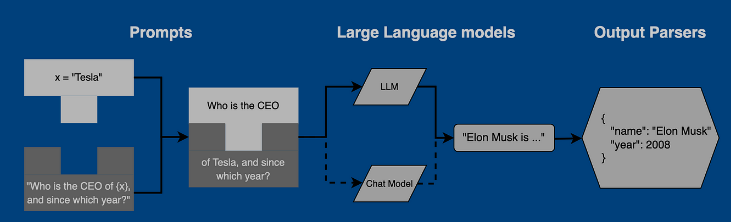

## Output Parser의 주요 기능

- `출력 포맷 변경`
  - 모델의 출력을 사용자가 원하는 형식으로 변환합니다. 예를 들어, JSON 형식으로 반환된 데이터를 테이블 형식으로 변환할 수 있습니다.
- `정보 추출`
  - 원시 텍스트 출력에서 필요한 정보(예: 날짜, 이름, 위치 등)를 추출합니다. 이를 통해 복잡한 텍스트 데이터에서 구조화된 정보를 얻을 수 있습니다.
- `결과 정제`
  - 모델 출력에서 불필요한 정보를 제거하거나, 응답을 더 명확하게 만드는 등의 후처리 작업을 수행합니다.
- `조건부 로직 적용`
  - 출력 데이터를 기반으로 특정 조건에 따라 다른 처리를 수행합니다. 예를 들어, 모델의 응답에 따라 사용자에게 추가 질문을 하거나, 다른 모델을 호출할 수 있습니다.

## Output Parser의 사용 사례

- `자연어 처리(NLP) 애플리케이션`
  - 질문 답변 시스템에서 정확한 답변만을 추출하여 사용자에게 제공합니다.
- `데이터 분석`
  - 대량의 텍스트 데이터에서 특정 패턴이나 통계 정보를 추출하여 분석 보고서를 생성합니다.
- `챗봇 개발`
  - 대화형 모델의 출력을 분석하여 사용자의 의도를 파악하고, 적절한 대화 흐름을 유지합니다.
- `콘텐츠 생성`
  - 생성된 콘텐츠에서 중요한 정보를 요약하거나, 특정 형식(예: 블로그 포스트, 뉴스 기사)에 맞게 콘텐츠를 재구성합니다.

## CSV Parser - CommaSeparatedListOutputParser

- `CommaSeparatedListOutputParser`는 쉼표로 구분된 항목 목록을 반환할 필요가 있을 때 유용합니다.
- 이 출력 파서를 사용하면, 사용자가 입력한 데이터나 요청한 정보를 쉼표로 구분하여 명확하고 간결한 목록 형태로 제공받을 수 있습니다.
- 예를 들어, 여러 개의 데이터 포인트, 이름, 항목 또는 다른 종류의 값들을 나열할 때 이를 통해 효과적으로 정보를 정리하고 사용자에게 전달할 수 있습니다.
- 이 방법은 정보를 구조화하고, 가독성을 높이며, 특히 데이터를 다루거나 리스트 형태의 결과를 요구하는 경우에 매우 유용합니다.
  - `PromptTemplate`를 사용하여 사용자 입력에 따라 동적으로 프롬프트를 생성합니다. 이때, `subject`를 입력 변수로 받고, `format_instructions`를 부분 변수로 설정합니다.

In [ ]:
from langchain.output_parsers import CommaSeparatedListOutputParser
from langchain.prompts import PromptTemplate
from langchain_openai import ChatOpenAI

In [ ]:
# 콤마로 구분된 리스트 출력 파서 초기화
output_parser = CommaSeparatedListOutputParser()

In [ ]:
# 출력 형식 지침 가져오기
format_instructions = output_parser.get_format_instructions()

In [ ]:
# 프롬프트 템플릿 설정
prompt = PromptTemplate(
    # 주제에 대한 다섯 가지를 나열하라는 템플릿
    template="List five {subject}.\n{format_instructions}",
    input_variables=["subject"],  # 입력 변수로 'subject' 사용
    # 부분 변수로 형식 지침 사용
    partial_variables={"format_instructions": format_instructions},
)

In [ ]:
# ChatOpenAI 모델 초기화
model = ChatOpenAI(temperature=0)

In [ ]:
# 프롬프트, 모델, 출력 파서를 연결하여 체인 생성
chain = prompt | model | output_parser

In [ ]:
chain.invoke(
    {"subject": "대한민국 관광명소"}
)  # "대한민국 관광명소"에 대한 체인 호출 실행

['경복궁', '남산타워', '부산 해운대해수욕장', '제주도 성산일출봉', '경주 불국사temples']

- `chain.stream`을 사용하여 "대한민국 관광명소"에 대한 스트림을 반복 처리합니다.
- 반복 중 스트림의 결과를 출력합니다.

In [ ]:
# 아이스크림 맛에 대한 스트림을 순회합니다.
for s in chain.stream({"subject": "대한민국 관광명소"}):
    print(s)  # 스트림의 내용을 출력합니다.

['경복궁']
['남산타워']
['부산 해운대해수욕장']
['제주도']
['경주여행.']


## JSON Parser - JsonOutputParser

### with Pydantic

- `JsonOutputParser`와 `Pydantic`을 사용하여, 모델 출력을 JSON 형식으로 파싱하고 Pydantic 모델로 구조화하는 과정을 설명합니다.
- `JsonOutputParser`는 모델의 출력을 JSON으로 해석하고, 지정된 `Pydantic 모델(CusineRecipe 클래스)`에 맞게 데이터를 구조화하여 제공합니다.
- 예제 코드 설명
  1. 먼저 자료구조를 의미하는 `CusineRecipe` 클래스를 `Pydantic BaseModel`을 사용하여 정의합니다.
  2. `name` 필드는 요리의 이름을 나타내고, `recipe` 필드는 해당 요리를 만드는 레시피를 뜻합니다.
  3. 출력 파서로 `JsonOutputParser` 인스턴스를 생성하고, `pydantic_object` 매개변수로 `CusineRecipe` 클래스를 전달하여, 모델 출력을 해당 Pydantic 모델로 파싱하도록 설정합니다.
  4. 그리고 `output_parser.get_format_instructions()` 메소드를 호출하여 모델에 전달할 포맷 지시사항을 얻습니다.
  5. 이 지시사항은 모델이 출력을 생성할 때 JSON 형식을 따르도록 안내하는 역할을 합니다.

In [ ]:
from langchain_core.output_parsers import PydanticOutputParser, JsonOutputParser
from pydantic import BaseModel, validate_call

In [ ]:
# 자료구조 정의 (pydantic)
# 1. 먼저 자료구조를 의미하는 `CusineRecipe` 클래스를 `Pydantic BaseModel`을 사용하여 정의합니다.
# 2. `name` 필드는 요리의 이름을 나타내고, `recipe` 필드는 해당 요리를 만드는 레시피를 뜻합니다.
class CusineRecipe(BaseModel):
    name: str = Field(description="name of a cusine")
    recipe: str = Field(description="recipe to cook the cusine")

In [ ]:
# 출력 파서 정의
# 3. 출력 파서로 `JsonOutputParser` 인스턴스를 생성하고, `pydantic_object` 매개변수로 `CusineRecipe` 클래스를 전달하여,
#    모델 출력을 해당 Pydantic 모델로 파싱하도록 설정합니다.
output_parser = PydanticOutputParser(pydantic_object=CusineRecipe)
output_parser

PydanticOutputParser(pydantic_object=<class '__main__.CusineRecipe'>)

In [ ]:
# 4. 그리고 `output_parser.get_format_instructions()` 메소드를 호출하여 모델에 전달할 포맷 지시사항을 얻습니다.
# 5. 이 지시사항은 모델이 출력을 생성할 때 JSON 형식을 따르도록 안내하는 역할을 합니다.
format_instructions = output_parser.get_format_instructions()

print(format_instructions)

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"name": {"title": "Name", "type": "string"}, "recipe": {"title": "Recipe", "type": "string"}}}
```


- 다음 단계는 모델에 입력으로 전달할 프롬프트를 구성하는 것입니다.
- `PromptTemplate`을 사용하여 `사용자 질문(query)`을 기반으로 한 프롬프트를 생성합니다.
- 프롬프트에는 사용자의 질문과 모델에 전달할 포맷 지시사항이 포함됩니다.

In [ ]:
# prompt 구성
prompt = PromptTemplate(
    template="Answer the user query.\n{format_instructions}\n{query}\n",
    input_variables=["query"],
    partial_variables={"format_instructions": format_instructions},
)

print(prompt)

input_variables=['query'] input_types={} partial_variables={'format_instructions': 'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"name": {"title": "Name", "type": "string"}, "recipe": {"title": "Recipe", "type": "string"}}}\n```'} template='Answer the user query.\n{format_instructions}\n{query}\n'


- 마지막으로 체인을 구성하고 호출하여 모델의 출력을 파싱하여 반환합니다.
- 이 체인은 사용자의 질문을 받아 프롬프트를 생성하고, 생성된 프롬프트를 모델에 전달한 후, 모델의 출력을 JSON 형식으로 파싱하고 `CusineRecipe` 객체로 변환하는 과정을 수행합니다.
- 체인을 호출하면 사용자의 질문에 대한 응답을 `CusineRecipe` 형태로 받게 됩니다.
- 이는 모델이 "Bibimbap" 요리법에 대한 정보를 JSON 형식으로 제공하고, 이 정보가 `CusineRecipe` 객체로 구조화되는 것을 의미합니다.

In [ ]:
chain = prompt | model | output_parser

chain.invoke({"query": "Let me know how to cook Bibimbap"})

CusineRecipe(name='Bibimbap', recipe='Bibimbap is a Korean mixed rice dish that is served as a bowl of warm white rice topped with vegetables, meat, a fried egg, and gochujang (red chili pepper paste). To cook Bibimbap, start by preparing the rice. Then, sauté various vegetables such as spinach, carrots, bean sprouts, and mushrooms separately. Cook some thinly sliced beef in a soy sauce-based marinade. Fry an egg sunny-side up. To assemble the dish, place the rice in a bowl, arrange the vegetables and beef on top, and place the fried egg in the center. Serve with a dollop of gochujang and mix everything together before eating. Enjoy your delicious Bibimbap!')

### without Pydantic

Pydantic 없이도 이 기능을 사용할 수 있습니다. 이 경우 JSON을 반환하도록 요청하지만, 스키마가 어떻게 되어야 하는지에 대한 구체적인 정보는 제공하지 않습니다.
- `JsonOutputParser` 클래스의 인스턴스를 `parser` 변수에 할당합니다.
- `PromptTemplate` 클래스를 사용하여 사용자 쿼리에 대한 프롬프트를 생성합니다.
  - 이때, `template` 매개변수에는 사용자 쿼리를 처리할 템플릿 문자열을,
  - `input_variables`에는 템플릿에서 사용할 변수 목록을,
  - `partial_variables`에는 parser에서 제공하는 형식 지침을 포함합니다.
- `prompt`, `model`, `parser`를 연결하여 `chain`을 구성합니다.
- `chain.invoke` 메소드를 호출하여 `{"query": query}` 매개변수를 전달함으로써, 사용자 쿼리에 대한 처리를 시작합니다.

In [ ]:
# 질의 작성
query = "온난화에 대해 알려주세요. 온난화에 대한 설명은 `description`에, 관련 키워드는 `hashtags`에 담아주세요."

parser = JsonOutputParser()  # JSON 출력 파서 초기화

prompt = PromptTemplate(
    # 사용자 쿼리에 답변하는 템플릿
    template="Answer the user query.\n{format_instructions}\n{query}\n",
    input_variables=["query"],  # 입력 변수로 'query' 사용
    # 부분 변수로 포맷 지시사항 설정
    partial_variables={
        "format_instructions": parser.get_format_instructions()},
)

chain = prompt | model | parser  # 프롬프트, 모델, 파서를 연결하는 체인 생성

chain.invoke({"query": query})  # 체인을 호출하여 농담 쿼리 처리

{'description': '온난화는 지구 온도가 상승하는 현상을 의미합니다. 이는 인간 활동으로 인해 대기 중 온실가스 농도가 증가하고 지구 표면의 열을 가두는 결과로 발생합니다. 온난화는 극지방의 빙하 녹아내림, 기후 변화, 자연재해 증가 등 다양한 부정적 영향을 미칠 수 있습니다.',
 'hashtags': ['온난화', '기후변화', '온실가스', '지구온도상승']}

## Pandas Parser - PandasDataFrameOutputParser

- Pandas DataFrame은 Python 프로그래밍 언어에서 널리 사용되는 데이터 구조로, 데이터 조작 및 분석을 위해 흔히 사용됩니다.
- 구조화된 데이터를 다루기 위한 포괄적인 도구 세트를 제공하여, 데이터 정제, 변환 및 분석과 같은 작업에 다양하게 활용될 수 있습니다.
- 이 출력 파서는 사용자가 임의의 Pandas DataFrame을 지정하고 해당 DataFrame에서 데이터를 추출하여 형식화된 사전 형태로 데이터를 조회할 수 있는 LLM을 요청할 수 있게 해줍니다.

In [ ]:
import pprint
from typing import Any, Dict

import pandas as pd
from langchain.output_parsers import (
    PandasDataFrameOutputParser,
)  # Pandas 데이터프레임 출력 파서
from langchain.prompts import PromptTemplate  # 프롬프트 템플릿
from langchain_openai import ChatOpenAI  # ChatOpenAI

In [ ]:
# ChatOpenAI 모델 초기화
model = ChatOpenAI(temperature=0)

- `format_parser_output` 함수는 파서 출력을 사전 형식으로 변환하고 이를 예쁘게 출력합니다.
- 출력된 각 키에 대해, 해당 키의 값을 `.to_dict()` 메소드를 사용하여 사전 형식으로 변환합니다.
- `pprint.PrettyPrinter` 클래스를 사용하여 변환된 출력을 가독성 높게 출력합니다.

In [ ]:
# 문서화 목적으로만 사용됩니다.
def format_parser_output(parser_output: Dict[str, Any]) -> None:
    for key in parser_output.keys():  # 파서 출력의 키들을 순회합니다.
        # 각 키의 값을 딕셔너리로 변환합니다.
        parser_output[key] = parser_output[key].to_dict()
    # 예쁘게 출력합니다.
    return pprint.PrettyPrinter(width=4, compact=True).pprint(parser_output)

- `titanic.csv` 데이터를 읽어온 뒤 DataFrame 을 로드하여 `df` 변수에 할당합니다.
- `PandasDataFrameOutputParser`를 사용하여 `DataFrame`을 파싱합니다.

In [ ]:
# 원하는 Pandas DataFrame을 정의합니다.
df = pd.read_csv(DATA_PATH+"titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 파서를 설정하고 프롬프트 템플릿에 지시사항을 주입합니다.
parser = PandasDataFrameOutputParser(dataframe=df)

컬럼 작업을 수행하는 예제입니다.
1. 사용자 쿼리를 처리하기 위한 프롬프트를 설정합니다.
2. `PromptTemplate`을 사용하여 쿼리 포맷과 관련 지시사항을 포함한 템플릿을 생성합니다.
3. `parser.get_format_instructions()` 함수를 호출하여 포맷 지시사항을 가져옵니다.
4. 프롬프트, 모델, 파서를 연결하여 처리 체인을 구성합니다.
5. `chain.invoke` 메소드를 사용하여 `df_query`에 대한 처리를 실행합니다.
6. `format_parser_output` 함수를 호출하여 파서의 출력을 포맷합니다.

In [ ]:
# 열 작업 예시입니다.
df_query = "Retrieve the passenges ages."

# 프롬프트 설정
prompt = PromptTemplate(
    # 사용자 쿼리에 답합니다.
    template="Answer the user query.\n{format_instructions}\n{query}\n",
    input_variables=["query"],  # 입력 변수 설정
    partial_variables={
        "format_instructions": parser.get_format_instructions()
    },  # 부분 변수 설정
)

chain = prompt | model | parser  # 체인 생성
parser_output = chain.invoke({"query": df_query})  # 체인 실행

format_parser_output(parser_output)  # 파서 출력 형식 지정

{'Age': {0: 22.0,
         1: 38.0,
         2: 26.0,
         3: 35.0,
         4: 35.0,
         5: nan,
         6: 54.0,
         7: 2.0,
         8: 27.0,
         9: 14.0,
         10: 4.0,
         11: 58.0,
         12: 20.0,
         13: 39.0,
         14: 14.0,
         15: 55.0,
         16: 2.0,
         17: nan,
         18: 31.0,
         19: nan}}


데이터 프레임의 첫 번째 행을 검색하는 쿼리를 처리합니다.
1. `PromptTemplate`을 사용하여 사용자 쿼리에 대한 프롬프트를 설정합니다. 이때, 쿼리와 포맷 지시사항을 변수로 사용합니다.
2. `parser.get_format_instructions()` 함수를 호출하여 포맷 지시사항을 가져옵니다.
프롬프트, 모델, 파서를 연결하여 처리 체인을 구성합니다.
3. 처리 체인을 통해 쿼리를 실행하고, `chain.invoke` 함수를 사용하여 쿼리 결과를 처리합니다.
4. `format_parser_output` 함수를 사용하여 파서의 출력 결과를 포맷합니다.

In [ ]:
# 행 연산 예시입니다.
df_query = "Retrieve the first row."

# 프롬프트 설정
prompt = PromptTemplate(
    # 사용자 질의에 답합니다.
    template="Answer the user query.\n{format_instructions}\n{query}\n",
    input_variables=["query"],  # 입력 변수
    partial_variables={
        "format_instructions": parser.get_format_instructions()
    },  # 부분 변수
)

chain = prompt | model | parser  # 체인 생성
parser_output = chain.invoke({"query": df_query})  # 체인 실행

format_parser_output(parser_output)  # 파서 출력 형식 지정

{'0': {'Age': 22.0,
       'Cabin': nan,
       'Embarked': 'S',
       'Fare': 7.25,
       'Name': 'Braund, '
               'Mr. '
               'Owen '
               'Harris',
       'Parch': 0,
       'PassengerId': 1,
       'Pclass': 3,
       'Sex': 'male',
       'SibSp': 1,
       'Survived': 0,
       'Ticket': 'A/5 '
                 '21171'}}


Pandas DataFrame의 특정 열에서 일부 행의 평균을 검색하는 작업 예제입니다.
- `PromptTemplate`을 사용하여 쿼리 포맷과 관련 지시사항을 포함한 프롬프트를 구성합니다.
- `parser.get_format_instructions()`을 호출하여 포맷 지시사항을 가져옵니다.
- 프롬프트, 모델, 파서를 연결하여 처리 체인을 구성합니다.
- 처리 체인을 통해 `사용자 쿼리(df_query)`에 대한 파싱 작업을 수행합니다.
- 파싱된 출력 결과를 출력합니다.

In [ ]:
# row 0 ~ 4의 평균 나이를 구합니다.
df["Age"].head().mean()

31.2

In [ ]:
# 임의의 Pandas DataFrame 작업 예시, 행의 수를 제한합니다.
df_query = "Retrieve the average of the ages from row 0 to 4."

# 프롬프트 설정
prompt = PromptTemplate(
    # 사용자 쿼리에 답합니다.
    template="Answer the user query.\n{format_instructions}\n{query}\n",
    input_variables=["query"],  # 입력 변수 설정
    partial_variables={
        "format_instructions": parser.get_format_instructions()
    },  # 부분 변수 설정
)

chain = prompt | model | parser  # 체인 생성
parser_output = chain.invoke({"query": df_query})  # 체인 실행

print(parser_output)  # 결과 출력

{'mean': 31.2}


# [LangChain Expression Language(LCEL)](https://python.langchain.com/v0.1/docs/expression_language/)

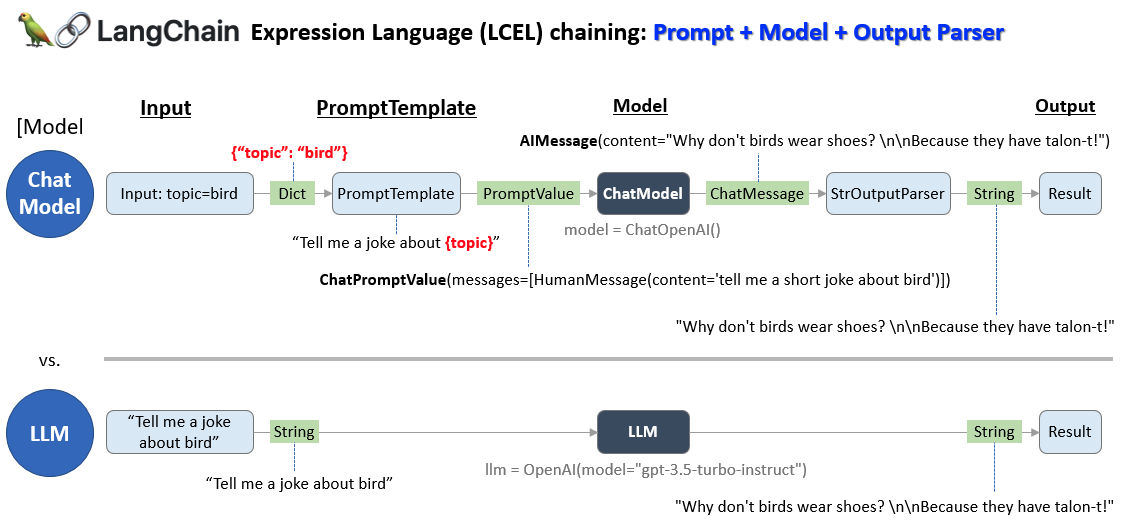

## PromptTemplate
- 사용자의 입력 변수를 사용하여 완전한 프롬프트 문자열을 만드는 데 사용되는 템플릿입니다
- `사용법`
  - `template`: 템플릿 문자열입니다. 이 문자열 내에서 중괄호 {}는 변수를 나타냅니다.
  - `input_variables`: 중괄호 안에 들어갈 변수의 이름을 리스트로 정의합니다.
- `input_variables`
  - input_variables는 PromptTemplate에서 사용되는 변수의 이름을 정의하는 리스트입니다.


In [ ]:
from langchain_teddynote.messages import stream_response  # 스트리밍 출력
from langchain_core.prompts import PromptTemplate

In [ ]:
# template 정의
template = "{country}의 수도는 어디인가요?"

# from_template 메소드를 이용하여 PromptTemplate 객체 생성
prompt_template = PromptTemplate.from_template(template)
prompt_template

PromptTemplate(input_variables=['country'], input_types={}, partial_variables={}, template='{country}의 수도는 어디인가요?')

In [ ]:
# prompt 생성
prompt = prompt_template.format(country="대한민국")
prompt

'대한민국의 수도는 어디인가요?'

## ChatOpenAI
- OpenAI 사의 채팅 전용 Large Language Model(llm) 입니다.
- 객체를 생성할 때 다음을 옵션 값을 지정할 수 있습니다. 옵션에 대한 상세 설명은 다음과 같습니다.
  - `temperature`: 사용할 샘플링 온도는 0과 2 사이에서 선택합니다. 0.8과 같은 높은 값은 출력을 더 무작위하게 만들고, 0.2와 같은 낮은 값은 출력을 더 집중되고 결정론적으로 만듭니다.
  - `max_tokens`: 채팅 완성에서 생성할 토큰의 최대 개수입니다.
  - `model_name`: 적용 가능한 모델 리스트 - gpt-3.5-turbo - gpt-4-turbo - gpt-4o

In [ ]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(
    model="gpt-3.5-turbo",
    max_tokens=2048,
    temperature=0.1,
)

## [LCEL 인터페이스](https://wikidocs.net/233345)
- 표준 인터페이스에는 다음이 포함됩니다.
  - `stream`: 응답의 청크를 스트리밍합니다.
  - `invoke`: 입력에 대해 체인을 호출합니다.
  - `batch`: 입력 목록에 대해 체인을 호출합니다.
- 비동기 메소드도 있습니다.
  - `astream`: 비동기적으로 응답의 청크를 스트리밍합니다.
  - `ainvoke`: 비동기적으로 입력에 대해 체인을 호출합니다.
  - `abatch`: 비동기적으로 입력 목록에 대해 체인을 호출합니다.
  - `astream_log`: 최종 응답뿐만 아니라 발생하는 중간 단계를 스트리밍합니다.

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

# ChatOpenAI 모델을 인스턴스화합니다.
model = ChatOpenAI()
# 주어진 토픽에 대한 농담을 요청하는 프롬프트 템플릿을 생성합니다.
prompt = PromptTemplate.from_template("{topic} 에 대하여 3문장으로 설명해줘.")
# 프롬프트와 모델을 연결하여 대화 체인을 생성합니다.
chain = prompt | model | StrOutputParser()

### stream
- 이 함수는 chain.stream 메서드를 사용하여 주어진 토픽에 대한 데이터 스트림을 생성하고, 이 스트림을 반복하여 각 데이터의 내용(content)을 즉시 출력합니다.
- end="" 인자는 출력 후 줄바꿈을 하지 않도록 설정하며, flush=True 인자는 출력 버퍼를 즉시 비우도록 합니다.

In [ ]:
# chain.stream 메서드를 사용하여 '멀티모달' 토픽에 대한 스트림을 생성하고 반복합니다.
for token in chain.stream({"topic": "멀티모달"}):
    # 스트림에서 받은 데이터의 내용을 출력합니다. 줄바꿈 없이 이어서 출력하고, 버퍼를 즉시 비웁니다.
    print(token, end="", flush=True)

멀티모달은 여러 가지 다른 형태의 통신 수단을 통해 정보를 전달하는 방식을 의미합니다. 이는 텍스트, 음성, 이미지, 동영상 등 다양한 형식을 활용하여 사용자에게 정보를 제공하고 상호작용하는 방식입니다. 멀티모달은 사용자 경험을 향상시키고 효율적인 커뮤니케이션을 가능하게 합니다.

### invoke
- chain 객체의 invoke 메서드는 주제를 인자로 받아 해당 주제에 대한 처리를 수행합니다.

In [ ]:
# chain 객체의 invoke 메서드를 호출하고, 'ChatGPT'라는 주제로 딕셔너리를 전달합니다.
chain.invoke({"topic": "ChatGPT"})

'ChatGPT는 자연어 처리 기술을 사용하여 대화를 하는 인공지능 챗봇이다. 사용자의 질문이나 요청에 대해 즉각적이고 자연스러운 답변을 제공한다. ChatGPT는 다양한 주제에 대해 대화를 나누는데 활용될 수 있다.'

### batch
- 함수 chain.batch는 여러 개의 딕셔너리를 포함하는 리스트를 인자로 받아, 각 딕셔너리에 있는 topic 키의 값을 사용하여 일괄 처리를 수행합니다.

In [ ]:
# 주어진 토픽 리스트를 batch 처리하는 함수 호출
chain.batch([{"topic": "ChatGPT"}, {"topic": "Instagram"}])

['ChatGPT는 자연어 처리 기술을 사용하여 대화를 하는 인공지능 챗봇이다. 사용자의 질문이나 요청에 대해 즉각적이고 자연스러운 답변을 제공한다. ChatGPT는 다양한 주제에 대해 대화를 나누는데 활용될 수 있다.',
 'Instagram은 사진과 동영상을 공유하는 소셜 미디어 플랫폼으로, 사용자들은 자신의 일상을 쉽게 공유하고 소통할 수 있습니다. 해시태그를 통해 관심사나 주제별로 검색할 수 있어 다양한 콘텐츠를 즐길 수 있습니다. 또한 인스타그램 스토리를 통해 임시적인 콘텐츠를 공유하고 친구들과 소통할 수 있습니다.']

- max_concurrency 매개변수를 사용하여 동시 요청 수를 설정할 수 있습니다
- config 딕셔너리는 max_concurrency 키를 통해 동시에 처리할 수 있는 최대 작업 수를 설정합니다. 여기서는 최대 3개의 작업을 동시에 처리하도록 설정되어 있습니다.

In [ ]:
chain.batch(
    [
        {"topic": "ChatGPT"},
        {"topic": "Instagram"},
        {"topic": "멀티모달"},
        {"topic": "프로그래밍"},
        {"topic": "머신러닝"},
    ],
    config={"max_concurrency": 3},
)

['ChatGPT는 자연어 처리 기술을 사용하여 대화를 하는 인공지능 챗봇이다. 사용자의 질문이나 요청에 대해 즉각적이고 자연스러운 답변을 제공한다. ChatGPT는 다양한 주제에 대해 대화를 나누는데 활용될 수 있다.',
 'Instagram은 사진과 동영상을 공유하는 소셜 미디어 플랫폼으로, 사용자들은 자신의 일상을 쉽게 공유하고 소통할 수 있습니다. 해시태그를 통해 관심사나 주제별로 검색할 수 있어 다양한 콘텐츠를 즐길 수 있습니다. 또한 인스타그램 스토리를 통해 임시적인 콘텐츠를 공유하고 친구들과 소통할 수 있습니다.',
 '멀티모달은 여러 가지 다른 형태의 모드(예: 음성, 텍스트, 이미지)를 조합하여 정보를 제공하거나 상호작용하는 인터페이스를 의미합니다. 이를 통해 사용자는 보다 다양한 방식으로 정보를 이해하고 소통할 수 있습니다. 멀티모달은 사용자 경험을 향상시키고 접근성을 높여주는 효과적인 방법으로 활용될 수 있습니다.',
 '프로그래밍은 컴퓨터에게 작업을 시키기 위해 일련의 명령어를 작성하는 과정이다. 이러한 명령어들은 프로그래밍 언어를 통해 작성되며, 컴퓨터가 이를 해석하여 원하는 결과를 만들어낸다. 프로그래밍에는 문제 해결능력과 논리적 사고가 필요하며, 오류를 찾아내고 수정하는 능력도 중요하다.',
 '머신러닝은 컴퓨터 시스템이 데이터를 학습하고 패턴을 발견하여 예측하도록 하는 인공지능의 한 분야입니다. 이를 위해 다양한 알고리즘과 모델이 사용되며, 데이터의 크기와 품질이 모델의 성능에 큰 영향을 미칩니다. 머신러닝은 이미지 및 음성 인식, 자연어 처리, 예측 분석 등 다양한 분야에서 활발히 활용되고 있습니다.']

### async stream: 비동기 스트림
- 함수 chain.astream은 비동기 스트림을 생성하며, 주어진 토픽에 대한 메시지를 비동기적으로 처리합니다.
- 비동기 for 루프(async for)를 사용하여 스트림에서 메시지를 순차적으로 받아오고, print 함수를 통해 메시지의 내용(s.content)을 즉시 출력합니다.
- end=""는 출력 후 줄바꿈을 하지 않도록 설정하며, flush=True는 출력 버퍼를 강제로 비워 즉시 출력되도록 합니다.

In [ ]:
# 비동기 스트림을 사용하여 'YouTube' 토픽의 메시지를 처리합니다.
async for token in chain.astream({"topic": "YouTube"}):
    # 메시지 내용을 출력합니다. 줄바꿈 없이 바로 출력하고 버퍼를 비웁니다.
    print(token, end="", flush=True)

YouTube는 동영상 공유 플랫폼으로, 사용자들이 영상을 업로드하고 시청할 수 있는 서비스이다. 누구나 채널을 만들어 자신의 영상을 공유할 수 있고, 구독자들과 소통할 수 있다. 다양한 콘텐츠가 제공되어 있어, 사용자들은 자신의 취향에 맞는 동영상을 쉽게 찾아 시청할 수 있다.

### async invoke: 비동기 호출
- chain 객체의 ainvoke 메서드는 비동기적으로 주어진 인자를 사용하여 작업을 수행합니다.
- 여기서는 topic이라는 키와 NVDA(엔비디아의 티커) 라는 값을 가진 딕셔너리를 인자로 전달하고 있습니다.
- 이 메서드는 특정 토픽에 대한 처리를 비동기적으로 요청하는 데 사용될 수 있습니다.

In [ ]:
# 비동기 체인 객체의 'ainvoke' 메서드를 호출하여 'NVDA' 토픽을 처리합니다.
my_process = chain.ainvoke({"topic": "NVDA"})

In [ ]:
# 비동기로 처리되는 프로세스가 완료될 때까지 기다립니다.
await my_process

'NVDA는 미국의 기업으로서 시각 장애인을 위한 스크린 리더 및 음성 인식 소프트웨어를 개발하고 판매하는 선두 기업이다. 이들의 제품은 시각 장애인들이 컴퓨터를 사용하는 데 도움을 주고 접근성을 향상시키는 데 기여하고 있다. NVDA는 무료로 다운로드 및 사용할 수 있는 오픈 소스 소프트웨어로 제공되며 글로벌 시장에서 널리 사용되고 있다.'

### async batch: 비동기 배치
- 함수 abatch는 비동기적으로 일련의 작업을 일괄 처리합니다.
- 이 예시에서는 chain 객체의 abatch 메서드를 사용하여 topic 에 대한 작업을 비동기적으로 처리하고 있습니다.
- await 키워드는 해당 비동기 작업이 완료될 때까지 기다리는 데 사용됩니다.

In [ ]:
# 주어진 토픽에 대해 비동기적으로 일괄 처리를 수행합니다.
my_abatch_process = chain.abatch(
    [{"topic": "YouTube"}, {"topic": "Instagram"}, {"topic": "Facebook"}]
)

In [ ]:
# 비동기로 처리되는 일괄 처리 프로세스가 완료될 때까지 기다립니다.
await my_abatch_process

['YouTube는 전 세계에서 가장 인기 있는 동영상 공유 플랫폼이다. 사용자들은 다양한 주제의 동영상을 시청하고 업로드할 수 있으며, 댓글과 좋아요 등의 기능을 통해 소통할 수 있다. 유명한 유튜버들은 광고 수익을 얻을 수 있어 많은 사람들이 창작 활동을 펼치고 있다.',
 'Instagram은 사진과 동영상을 공유하는 소셜 미디어 플랫폼으로, 사용자들은 자신의 일상을 쉽게 공유하고 소통할 수 있습니다. 해시태그를 통해 관심사나 주제별로 검색할 수 있어 다양한 콘텐츠를 즐길 수 있습니다. 또한 인스타그램 스토리를 통해 임시적인 콘텐츠를 공유하고 친구들과 소통할 수 있습니다.',
 'Facebook은 세계적으로 가장 인기 있는 소셜 네트워킹 서비스 중 하나로, 사용자들이 친구들과 소통하고 사진, 동영상 등을 공유할 수 있는 플랫폼이다. 또한 광고 및 비즈니스 활동을 위한 도구로도 널리 사용되며, 사용자들은 그룹을 만들어 서로의 관심사를 공유하고 소통할 수 있다. 그러나 최근 개인정보보호 문제와 논란으로 인해 사용자들의 관심을 끌고 있다.']

### Parallel: 병렬성
- LangChain Expression Language가 병렬 요청을 지원하는 방법을 살펴봅시다. 예를 들어, RunnableParallel을 사용할 때(자주 사전 형태로 작성됨), 각 요소를 병렬로 실행합니다.
- langchain_core.runnables 모듈의 RunnableParallel 클래스를 사용하여 두 가지 작업을 병렬로 실행하는 예시를 보여줍니다.
- ChatPromptTemplate.from_template 메서드를 사용하여 주어진 country에 대한 수도 와 면적 을 구하는 두 개의 체인(chain1, chain2)을 만듭니다.
- 이 체인들은 각각 model과 파이프(|) 연산자를 통해 연결됩니다. 마지막으로, RunnableParallel 클래스를 사용하여 이 두 체인을 capital와 area이라는 키로 결합하여 동시에 실행할 수 있는 combined 객체를 생성합니다.

In [ ]:
from langchain_core.runnables import RunnableParallel

# {country} 의 수도를 물어보는 체인을 생성합니다.
chain1 = (
    PromptTemplate.from_template("{country} 의 수도는 어디야?")
    | model
    | StrOutputParser()
)

# {country} 의 면적을 물어보는 체인을 생성합니다.
chain2 = (
    PromptTemplate.from_template("{country} 의 면적은 얼마야?")
    | model
    | StrOutputParser()
)

# 위의 2개 체인을 동시에 생성하는 병렬 실행 체인을 생성합니다.
combined = RunnableParallel(capital=chain1, area=chain2)

- chain1.invoke() 함수는 chain1 객체의 invoke 메서드를 호출합니다.
- 이때, country이라는 키에 대한민국라는 값을 가진 딕셔너리를 인자로 전달합니다.

In [ ]:
# chain1 를 실행합니다.
chain1.invoke({"country": "대한민국"})

'대한민국의 수도는 서울이에요.'

- 이번에는 chain2.invoke() 를 호출합니다. country 키에 다른 국가인 미국 을 전달합니다.

In [ ]:
# chain2 를 실행합니다.
chain2.invoke({"country": "미국"})

'미국의 총 면적은 9,833,520 km² 입니다.'

- combined 객체의 invoke 메서드는 주어진 country에 대한 처리를 수행합니다.
- 이 예제에서는 대한민국라는 주제를 invoke 메서드에 전달하여 실행합니다.

In [ ]:
# 병렬 실행 체인을 실행합니다.
combined.invoke({"country": "대한민국"})

{'capital': '대한민국의 수도는 서울이에요.', 'area': '대한민국의 총 면적은 약 100,363 제곱 킬로미터 입니다.'}

### 배치에서의 병렬 처리
- 병렬 처리는 다른 실행 가능한 코드와 결합될 수 있습니다. 배치와 병렬 처리를 사용해 보도록 합시다.
- chain1.batch 함수는 여러 개의 딕셔너리를 포함하는 리스트를 인자로 받아, 각 딕셔너리에 있는 "topic" 키에 해당하는 값을 처리합니다.

이 예시에서는 "대한민국"와 "미국"라는 두 개의 토픽을 배치 처리하고 있습니다.

In [ ]:
# 배치 처리를 수행합니다.
chain1.batch([{"country": "대한민국"}, {"country": "미국"}])

['대한민국의 수도는 서울이에요.', '미국의 수도는 워싱턴 D.C.입니다.']

- chain2.batch 함수는 여러 개의 딕셔너리를 리스트 형태로 받아, 일괄 처리(batch)를 수행합니다.
- 이 예시에서는 대한민국와 미국라는 두 가지 국가에 대한 처리를 요청합니다.

In [ ]:
# 배치 처리를 수행합니다.
chain2.batch([{"country": "대한민국"}, {"country": "미국"}])

['대한민국의 총 면적은 약 100,363 제곱 킬로미터 입니다.', '미국의 총 면적은 9,833,520 km² 입니다.']

- combined.batch 함수는 주어진 데이터를 배치로 처리하는 데 사용됩니다.

이 예시에서는 두 개의 딕셔너리 객체를 포함하는 리스트를 인자로 받아 각각 대한민국와 미국 두 나라에 대한 데이터를 배치 처리합니다.

In [ ]:
# 주어진 데이터를 배치로 처리합니다.
combined.batch([{"country": "대한민국"}, {"country": "미국"}])

[{'capital': '대한민국의 수도는 서울이에요.', 'area': '대한민국의 총 면적은 약 100,363 제곱 킬로미터 입니다.'},
 {'capital': '미국의 수도는 워싱턴 D.C.입니다.', 'area': '미국의 총 면적은 9,833,520 km² 입니다.'}]